In [ ]:
# @title Setup
# Download the power spectrum dict file
!pip install --quiet -U --no-cache-dir gdown --pre
!gdown 1zmNZ5fkoW04JgYBX0fxmWVyEWXFskaaB

Downloading...
From: https://drive.google.com/uc?id=1zmNZ5fkoW04JgYBX0fxmWVyEWXFskaaB
To: /content/power_spectrum_dict.npy
100% 1.37M/1.37M [00:00<00:00, 139MB/s]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def get_metadata(metaname):
  """
  Parameters
  ----------
  metaname: str
    metaname consists of rat number, study day, condition, treatment value, trial number
    and phasic/tonic states followed by the REM epoch index, each separated by underscore.
    Example: Rat2_SD4_HC_2_posttrial1_tonic0

  Returns
  -------
  metadata: dict
   Dictionary object which contains each conditions.
  """
  metadata = {}

  metaname  = metaname.split('_')
  metadata["rat_id"]    = int(metaname[0][-1])
  metadata["study_day"] = int(metaname[1][-1])
  metadata["condition"] = metaname[2]
  metadata["treatment"] = int(metaname[3])
  metadata["trial_num"] = int(metaname[4][-1])
  metadata["state"]     = metaname[5][:-1]
  return metadata

# Load the file
# The file is a dict object in a format of {name:power_spectrum}
# Each spectrum contains the power values up to 100 Hz.
spectras = np.load('power_spectrum_dict.npy', allow_pickle='TRUE').item()

In [ ]:
for metaname in spectras.keys():
  metadata = get_metadata(metaname)

  # Further analysis

## Example 1: Plotting phasic and tonic power spectrum of RGS14 dataset

In [ ]:
phasic_spectrum = []
tonic_spectrum  = []

for metaname in spectras.keys():
  metadata = get_metadata(metaname)
  if metadata["treatment"] >= 2: # Select the RGS14 dataset
    if metadata["state"] == "tonic":
      tonic_spectrum.append(spectras[metaname])
    else:
      phasic_spectrum.append(spectras[metaname])

spectrum_phasic = np.vstack(phasic_spectrum)
spectrum_tonic = np.vstack(tonic_spectrum)

phasic_spectrum_mean = np.mean(spectrum_phasic, axis=0)
tonic_spectrum_mean = np.mean(spectrum_tonic, axis=0)

phasic_spectrum_err = np.std(spectrum_phasic, axis=0)/(len(spectrum_phasic)**0.5)
tonic_spectrum_err = np.std(spectrum_tonic, axis=0)/(len(spectrum_tonic)**0.5)

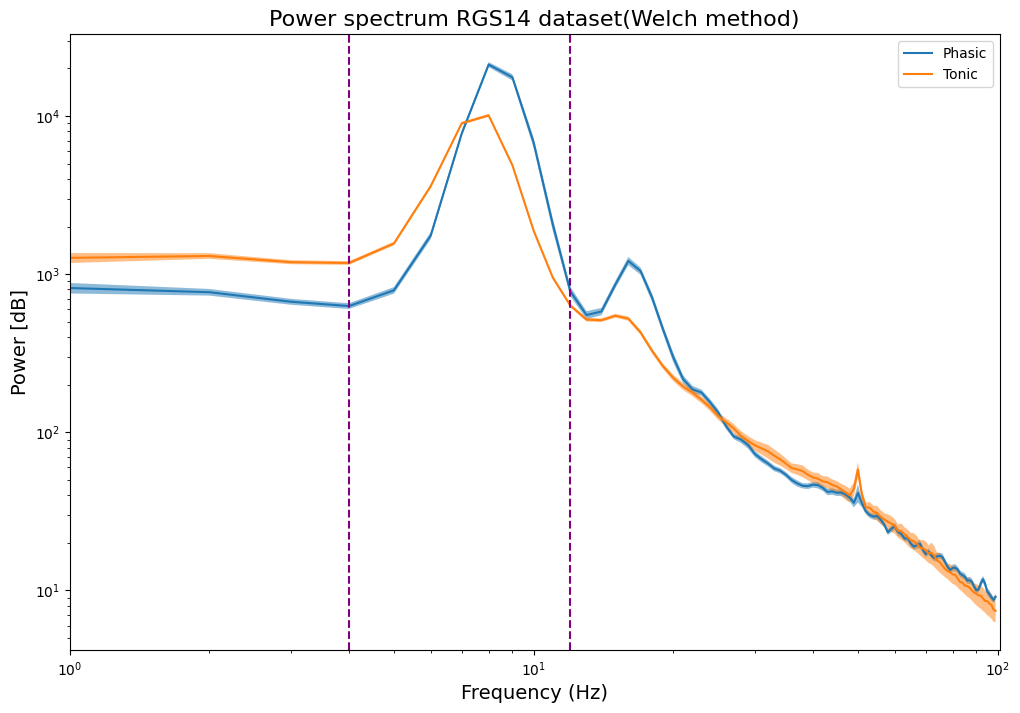

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(phasic_spectrum_mean)
plt.plot(tonic_spectrum_mean)

plt.fill_between(np.arange(100), phasic_spectrum_mean - phasic_spectrum_err,
                 phasic_spectrum_mean + phasic_spectrum_err,
                 alpha=0.5, label='Standard Error of Phasic Spectrum')

plt.fill_between(np.arange(100), tonic_spectrum_mean - tonic_spectrum_err,
                 tonic_spectrum_mean + tonic_spectrum_err,
                 alpha=0.5, label='Standard Error of Tonic Spectrum')

plt.xlabel('Frequency (Hz)', fontsize=14)
plt.ylabel('Power [dB]', fontsize=14)

plt.yscale('log')
plt.xscale('log')

plt.xlim((1, 101))

plt.axvline(x=4, color='purple', linestyle='--')
plt.axvline(x=12, color='purple', linestyle='--')

plt.title('Power spectrum RGS14 dataset (Welch method)', fontsize=16)
plt.legend(['Phasic', 'Tonic'])

## Example 2: Plotting the phasic and tonic power spectrum of CBD dataset for only negative treatment rats (VEH)

In [ ]:
phasic_spectrum = []
tonic_spectrum  = []

for metaname in spectras.keys():
  metadata = get_metadata(metaname)
  if metadata["treatment"] == 0: # Select the RGS14 dataset
    if metadata["state"] == "tonic":
      tonic_spectrum.append(spectras[metaname])
    else:
      phasic_spectrum.append(spectras[metaname])

spectrum_phasic = np.vstack(phasic_spectrum)
spectrum_tonic = np.vstack(tonic_spectrum)

phasic_spectrum_mean = np.mean(spectrum_phasic, axis=0)
tonic_spectrum_mean = np.mean(spectrum_tonic, axis=0)

phasic_spectrum_err = np.std(spectrum_phasic, axis=0)/(len(spectrum_phasic)**0.5)
tonic_spectrum_err = np.std(spectrum_tonic, axis=0)/(len(spectrum_tonic)**0.5)

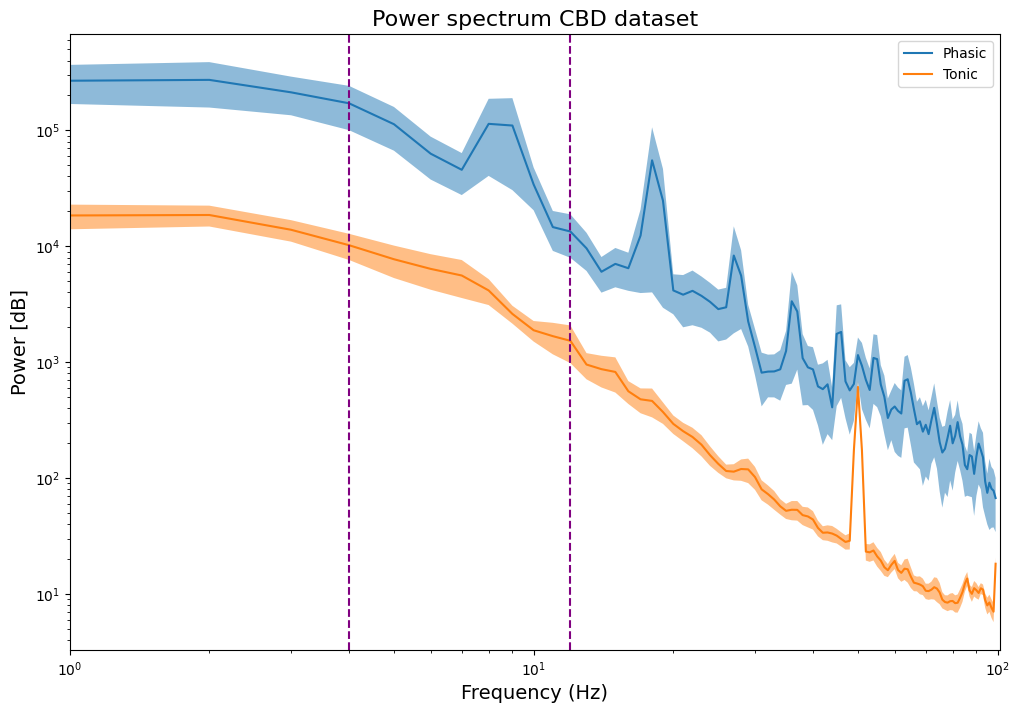

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(phasic_spectrum_mean)
plt.plot(tonic_spectrum_mean)

plt.fill_between(np.arange(100), phasic_spectrum_mean - phasic_spectrum_err,
                 phasic_spectrum_mean + phasic_spectrum_err,
                 alpha=0.5, label='Standard Error of Phasic Spectrum')

plt.fill_between(np.arange(100), tonic_spectrum_mean - tonic_spectrum_err,
                 tonic_spectrum_mean + tonic_spectrum_err,
                 alpha=0.5, label='Standard Error of Tonic Spectrum')

plt.xlabel('Frequency (Hz)', fontsize=14)
plt.ylabel('Power [dB]', fontsize=14)

plt.yscale('log')
plt.xscale('log')

plt.xlim((1, 101))

plt.axvline(x=4, color='purple', linestyle='--')
plt.axvline(x=12, color='purple', linestyle='--')

plt.title('Power spectrum CBD dataset', fontsize=16)
plt.legend(['Phasic', 'Tonic'])